In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!unzip /content/drive/MyDrive/AdversarialPatch-LocalFeatureExtractor-main.zip -d /content/drive/MyDrive/

In [3]:
%cd /content/drive/MyDrive/AdversarialPatch-LocalFeatureExtractor-main

/content/drive/MyDrive/AdversarialPatch-LocalFeatureExtractor-main


In [4]:
#!pip install -r requirements.txt

In [5]:
#!tar -xzvf /content/drive/MyDrive/data.tar.gz -C /content/drive/MyDrive/AdversarialPatch-LocalFeatureExtractor-main/

In [6]:
!python3 chessboard.py --rect_width 10 --rect_height 10 --width 128 --height 128 --save patches/chessboard_128.png


In [7]:
!python3 patchgen.py --cuda --epoch 100 --width 128 --height 128 --save patches/adversarial_patch_128.png

mse_loss=0.997, ce_loss=12.369, acc=0.000: 100% 100/100 [00:07<00:00, 13.28it/s]


In [11]:
!python3 maskgen.py --dirs data/hpatches-mask/* --mask-file mask_128.json --patch-width 128 --patch-height 128

In [9]:
#!python3 patch_eval.py --dirs data/hpatches-mask/* --mask-file mask_indiv_128.json --patch-file patches/patch_chess_w128_h128.png --device cuda --log log/

In [10]:

#!python3 patch_eval.py \
#  --dirs data/hpatches-sequences-release/ \
#  --mask-file mask_128.json \
#  --patch-file patches/targeted_patch.png \
#  --device cuda \
#  --log log/


In [ ]:
!python3 patch_eval.py \
    --dirs data/hpatches-mask/v_bark \
    --mask-file mask_indiv_128.json \
    --patch-file patches/patch_chess_w128_h128.png \
    --device cuda \
    --log log/eval_results.txt


data/hpatches-mask/v_bark/mask_indiv_128.json: {'total point': np.float64(404.0), 'source total points': np.float64(199.6), 'target total points': np.float64(86.8), 'source points ratio': np.float64(0.5193510645929512), 'target points ratio': np.float64(0.17717696624858625), 't_count': np.float64(0.2), 'f_count': np.float64(187.0), 'TP': np.float64(0.001), 'FP': np.float64(0.9368989898989899), 'repeatability': np.float64(0.2893865014490281), 'homography estimation 1': np.float64(0.0), 'homography estimation 3': np.float64(0.0), 'homography estimation 5': np.float64(0.0)}
100%|███████████████| 1/1 [01:38<00:00, 98.02s/it]
{'total point': np.float64(404.0), 'source total points': np.float64(199.6), 'target total points': np.float64(86.8), 'source points ratio': np.float64(0.5193510645929512), 'target points ratio': np.float64(0.17717696624858625), 't_count': np.float64(0.2), 'f_count': np.float64(187.0), 'TP': np.float64(0.001), 'FP': np.float64(0.9368989898989899), 'repeatability': np.f

In [10]:
!python3 patch_eval.py \
    --dirs data/hpatches-mask/* \
    --mask-file mask_indiv_128.json \
    --patch-file patches/patch_chess_w128_h128.png \
    --device cuda \
    --log log/

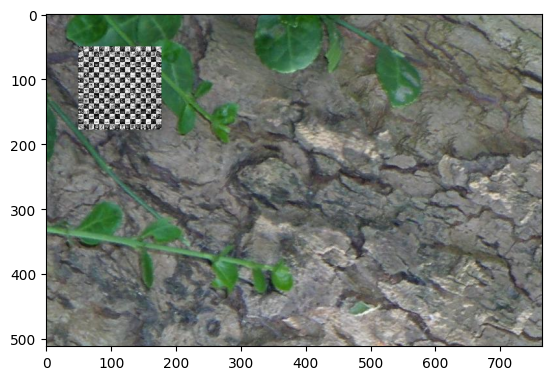

True

In [12]:
import cv2
from google.colab.patches import cv2_imshow # This line is already in the user's code
import matplotlib.pyplot as plt

# Update image paths to use .ppm files
original_image_path = "data/hpatches-mask/v_bark/1.ppm"
patched_image_path = "patches/patch_chess_w128_h128.png"

# Load images
original_img = cv2.imread(original_image_path)
patched_img = cv2.imread(patched_image_path)

# Check if images are loaded correctly
if original_img is None:
    print(f" Error loading original image: {original_image_path}")
if patched_img is None:
    print(f" Error loading patched image: {patched_image_path}")

patch_size = (128, 128)  # Ensure the patch size matches your expectation
patch = cv2.resize(patched_img, patch_size)

# Define the position to overlay the patch (top-left corner)
x_offset, y_offset = 50, 50  # Change this to any (x, y) coordinate

# Overlay the patch onto the image
original_img[y_offset:y_offset+patch_size[1], x_offset:x_offset+patch_size[0]] = patch

# Show the modified image
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)) # Converted to RGB for plt.imshow()
plt.show()

# Save the output
cv2.imwrite("output_with_patch.png", original_img)




In [13]:
#!pip uninstall torch torchvision torchaudio
#!pip install torch torchvision torchaudio

In [14]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [37]:
from models.superpoint import SuperPointNet

# Load model
model = SuperPointNet()
model.load_state_dict(torch.load("models/superpoint_v1.pth", map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))
model.eval()  # Set to evaluation mode

# Move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


SuperPointNet(
  (relu): ReLU(inplace=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1a): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1b): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2a): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2b): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3a): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3b): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4a): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4b): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (convPa): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (convPb): Conv2d(256, 65, kernel_size=(1, 1), stride=(1, 1))
  (convDa): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (convDb): Conv2d

In [16]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from models.sift import SIFT
sift_model = SIFT()

In [18]:
print(device)

cuda


In [19]:
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_tensor = torch.tensor(img, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0
    return img, img_tensor.to(device)

In [20]:
def Render_Match_superpoints(image1, image1_tensor,image2, image2_tensor):
    with torch.no_grad():
      keypoints1, descriptors1 = sift_model.to_cv2(image1_tensor)
      keypoints2, descriptors2 = sift_model.to_cv2(image2_tensor)

    with torch.no_grad():
      keypoints1_sp, descriptors1_sp = model.to_cv2(image1_tensor)
      keypoints2_sp, descriptors2_sp = model.to_cv2(image2_tensor)

    descriptors1 = np.array(descriptors1, dtype=np.float32)
    descriptors2 = np.array(descriptors2, dtype=np.float32)

    descriptors1_sp = np.array(descriptors1_sp, dtype=np.float32)
    descriptors2_sp = np.array(descriptors2_sp, dtype=np.float32)

    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(descriptors1, descriptors2, k=2)
    matchessp = flann.knnMatch(descriptors1_sp, descriptors2_sp, k=2)

    good_matches = [m for m, n in matches if m.distance < 0.90 * n.distance]
    good_matchessp = [m for m, n in matchessp if m.distance < 0.90 * n.distance]
    bad_matchessp = [m for m, n in matchessp if m.distance >= 0.90 * n.distance]

    # Convert images to BGR for color visualization
    image1_color = cv2.cvtColor(image1, cv2.COLOR_GRAY2BGR)
    image2_color = cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR)

    # Draw patches (circles) on keypoints
    for kp in keypoints1:
      cv2.circle(image1_color, (int(kp.pt[0]), int(kp.pt[1])), 10, (0, 255, 0), 2)

    for kp in keypoints2:
      cv2.circle(image2_color, (int(kp.pt[0]), int(kp.pt[1])), 10, (0, 255, 0), 2)


    matched_image = cv2.drawMatches(
      image1_color, keypoints1, image2_color, keypoints2, good_matches, None,
      flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    matched_imagesp = cv2.drawMatches(
      image1_color, keypoints1_sp, image2_color, keypoints2_sp, good_matchessp, None,
      flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    plt.figure(figsize=(12, 6))
    plt.imshow(matched_imagesp, cmap="gray")
    plt.title(f"SIFT Keypoint Matches ({len(good_matches)} Matches and {len(bad_matchessp)} bad matches)")
    plt.axis("off")
    plt.show()
    return good_matchessp,keypoints1_sp, descriptors1_sp,keypoints2_sp, descriptors2_sp

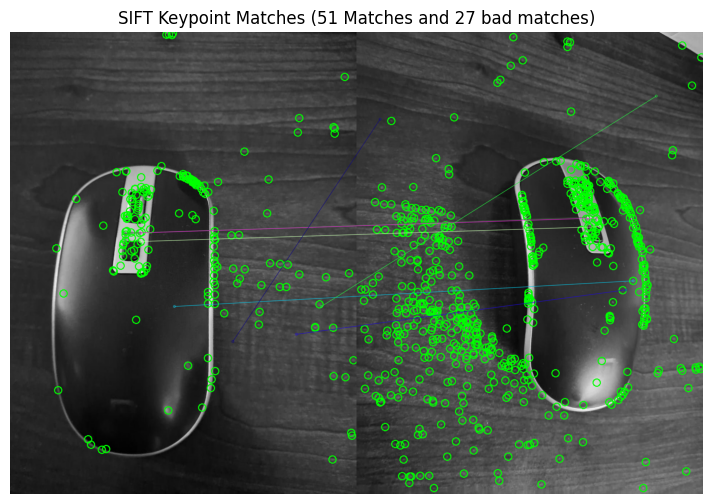

In [21]:
image1_path = "/content/a.png"
image2_path = "/content/b.png"
image1, image1_tensor = preprocess_image(image1_path)
image2, image2_tensor = preprocess_image(image2_path)
_,_,_,_,_=Render_Match_superpoints(image1, image1_tensor,image2, image2_tensor)

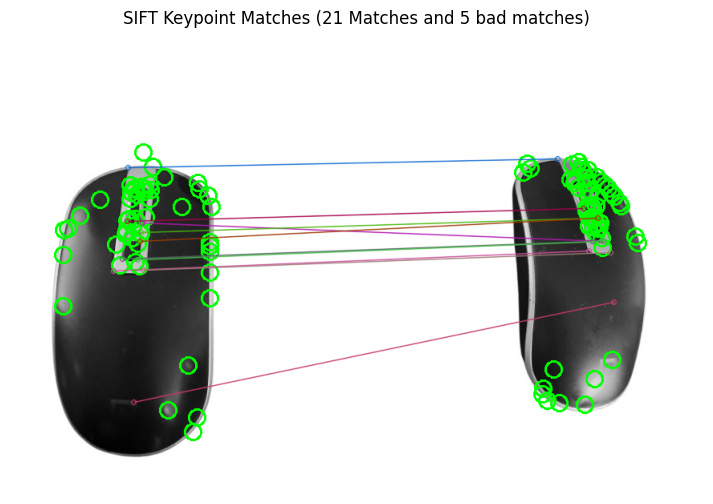

In [22]:
image1_path = "/content/a-removebg-preview.jpg"
image2_path = "/content/b-removebg-preview.jpg"
image1, image1_tensor = preprocess_image(image1_path)
image2, image2_tensor = preprocess_image(image2_path)
good_matches,keypoints1, descriptors1,keypoints2, descriptors2=Render_Match_superpoints(image1, image1_tensor,image2, image2_tensor)

In [23]:
import torch.nn.functional as F
import torchvision.transforms as T
import torchvision.models as model
from PIL import Image


In [24]:
# --- Classifier setup ---
import torchvision.models as models

classifier = models.resnet18(pretrained=True).eval().to(device)
clf_transform = T.Compose([
    T.ToPILImage(),
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# --- Helper functions ---
def classify(img, model):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    input_tensor = clf_transform(img_rgb).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(input_tensor)
    pred = torch.argmax(output, dim=1).item()
    return pred, output

def apply_tensor_patch_tensor(img_tensor, patch_tensor, top_left):
    """Applies the patch directly to the image tensor (fully differentiable)"""
    x, y = top_left
    patched = img_tensor.clone()
    # Use patch_size[0] (width) and patch_size[1] (height) for slicing
    patched[:, :, y:y + patch_size[1], x:x + patch_size[0]] = patch_tensor
    return patched



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 194MB/s]


In [25]:
pred_class1,_=classify(image1,classifier)
pred_class2,_=classify(image1,classifier)
pred_class1,pred_class2

(673, 673)

In [26]:
def generate_chessboard_patch(patch_size, num_tiles=4):  # Changed 'size' to 'patch_size' for clarity
    """Generate a chessboard pattern patch of shape (3, size, size)"""
    width, height = patch_size  # Unpack the tuple into width and height
    tile_width = width // num_tiles
    tile_height = height // num_tiles  # Calculate tile height separately
    patch = torch.zeros(1, width, height)  # Use width and height directly

    for i in range(num_tiles):
        for j in range(num_tiles):
            if (i + j) % 2 == 0:
                patch[:, i * tile_height:(i+1)*tile_height, j * tile_width:(j+1)*tile_width] = 1.0  # white
            else:
                patch[:, i * tile_height:(i+1)*tile_height, j * tile_width:(j+1)*tile_width] = 0.0  # black

    return patch.to(device)

In [27]:
def preprocess_image_for_patch(image, patch_size):
    # Convert to tensor, and add batch dimension
    img_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0  # [1, 1, H, W]

    # Convert to RGB (fake RGB if it's grayscale)
    img_rgb_tensor = img_tensor.repeat(1, 3, 1, 1)  # [1, 3, H, W]

    # Make sure the image size is at least the patch size
    H, W = img_rgb_tensor.shape[2], img_rgb_tensor.shape[3]
    if H < patch_size[0] or W < patch_size[1]:
        raise ValueError("Image dimensions are smaller than patch size!")

    return img_rgb_tensor

In [28]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [29]:
def show_image(patched_image_tensor):
  # De-normalize if needed and convert to CPU numpy image
  patched_img = patched_image_tensor.squeeze().detach().cpu()

  # If it's grayscale (1 channel), show with cmap
  if patched_img.shape[0] == 1:
    plt.imshow(patched_img[0], cmap='gray')
  elif patched_img.shape[0] == 3:
    # Convert (C, H, W) to (H, W, C)
    patched_img = patched_img.permute(1, 2, 0)
    plt.imshow(patched_img)
  else:
    print("Unexpected channel shape:", patched_img.shape)

  plt.title(f"Patched Image at ({x},{y}) ")
  plt.axis("off")
  plt.show()


 Misclassified to 846 at (147,169) after optimization


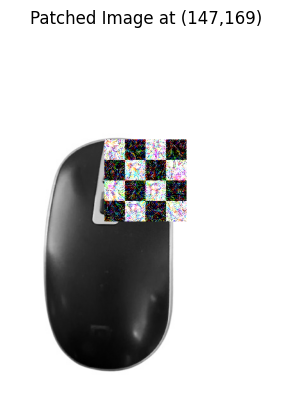

In [30]:
# Initial patch (single, trainable)
original_class=pred_class1
patch_tensor = generate_chessboard_patch(patch_size).repeat(3, 1, 1).unsqueeze(0).clone().detach().requires_grad_(True).to(device)
optimizer = torch.optim.Adam([patch_tensor], lr=0.1)

oimage1_tensor = preprocess_image_for_patch(image1, patch_size).to(device)
successful = False  # To check if any position works
x=0
y=0
matchh=None
for match in good_matches:
    matchh=match
    kp = keypoints1[match.queryIdx]
    x, y = map(int, kp.pt)
    # Use patch_size[0] (width) and patch_size[1] (height) for x and y calculations respectively
    x = min(x, oimage1_tensor.shape[3] - patch_size[0])  # Use patch_size[0] for width
    y = min(y, oimage1_tensor.shape[2] - patch_size[1])  # Use patch_size[1] for height


    # Apply patch without optimization (test first)
    with torch.no_grad():
        test_image = oimage1_tensor.clone()
        patched = apply_tensor_patch_tensor(test_image, patch_tensor, (x, y))
        output = classifier(patched)
        pred = output.argmax(dim=1).item()

        if pred != original_class:
            print(f" Misclassified to {pred} at ({x},{y}) using unoptimized patch!")
            show_image(patched)
            successful = True
            break

    # If no misclassification yet, try optimizing at this location
    for _ in range(10):
        current_image = oimage1_tensor.clone().detach()
        patched_image_tensor = apply_tensor_patch_tensor(current_image, patch_tensor, (x, y))

        output = classifier(patched_image_tensor)
        loss = -F.cross_entropy(output, torch.tensor([original_class]).to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        current_image = oimage1_tensor.clone().detach()
        patched_image_tensor = apply_tensor_patch_tensor(current_image, patch_tensor, (x, y))
        output = classifier(patched_image_tensor)
        pred = output.argmax(dim=1).item()

        if pred != original_class:
            print(f" Misclassified to {pred} at ({x},{y}) after optimization")
            show_image(patched_image_tensor)
            successful = True
            break
        else:
            print(f"{x},{y} => Still classified as {pred}")

if not successful:
    print(" Patch failed at all locations. Try multiple patches or increase patch size.")

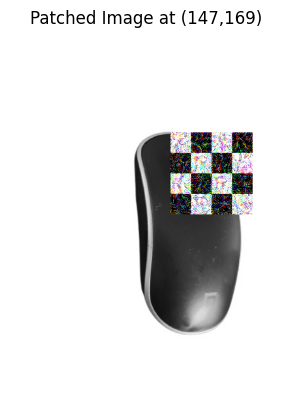

 Transferred patch misclassified image2 to 883 at (250,158)


In [31]:
# Convert image2 to tensor
oimage2_tensor = preprocess_image_for_patch(image2, patch_size).to(device)
original_class=pred_class1
# Get the corresponding keypoint in image2
target_kp = keypoints2[match.trainIdx]
x2, y2 = map(int, target_kp.pt)
# Use patch_size[0] (width) and patch_size[1] (height) for x2 and y2 calculations respectively
x2 = min(x2, oimage2_tensor.shape[3] - patch_size[0])  # Use patch_size[0] for width
y2 = min(y2, oimage2_tensor.shape[2] - patch_size[1])  # Use patch_size[1] for height


# Apply the patch to image2 at (x2, y2)
with torch.no_grad():
    patched_image2_tensor = apply_tensor_patch_tensor(oimage2_tensor.clone(), patch_tensor, (x2, y2))
    output2 = classifier(patched_image2_tensor)
    pred2 = output2.argmax(dim=1).item()

    show_image(patched_image2_tensor)

    if pred2 != original_class:
        print(f" Transferred patch misclassified image2 to {pred2} at ({x2},{y2})")
    else:
        print(f" Still classified as {pred2} at ({x2},{y2})")

In [32]:
patched_image2_tensor.shape

torch.Size([1, 3, 577, 433])

In [33]:
# Utility to convert image tensor to OpenCV format
def tensor_to_cv2_image(tensor):
    # Detach and move to CPU
    img = tensor.detach().cpu().squeeze()

    if len(img.shape) == 2:
        img_np = img.numpy()
        img_np = (img_np * 255).astype(np.uint8)
    elif len(img.shape) == 3:
        img_np = img.permute(1, 2, 0).numpy()
        img_np = (img_np * 255).astype(np.uint8)
    else:
        raise ValueError("Unexpected tensor shape: " + str(img.shape))

    return img_np


In [34]:
patched_image2_tensor = patched_image2_tensor[:, 0:1, :, :]
patched_image2_tensor.shape,image1_tensor.shape

(torch.Size([1, 1, 577, 433]), torch.Size([1, 1, 577, 433]))

In [35]:
patched_image2 = tensor_to_cv2_image(patched_image2_tensor)

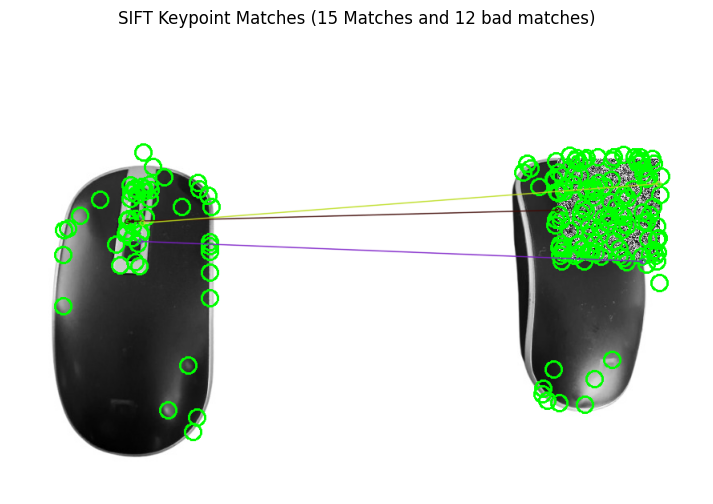

In [38]:
_, _, _, _, _ = Render_Match_superpoints(image1, image1_tensor, patched_image2, patched_image2_tensor)


# **Defense Using JPEG Compression**

In [39]:
import cv2
import numpy as np

def jpeg_compression_image(image, quality=75):
    # Perform JPEG compression
    _, encimg = cv2.imencode('.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), quality])

    # Decompress the image
    decimg = cv2.imdecode(encimg, 0)  # 0 indicates grayscale (single channel)

    return decimg

# Perform JPEG compression on the image
compressed_image = jpeg_compression_image(patched_image2)




In [40]:
compressed_image.shape

(577, 433)

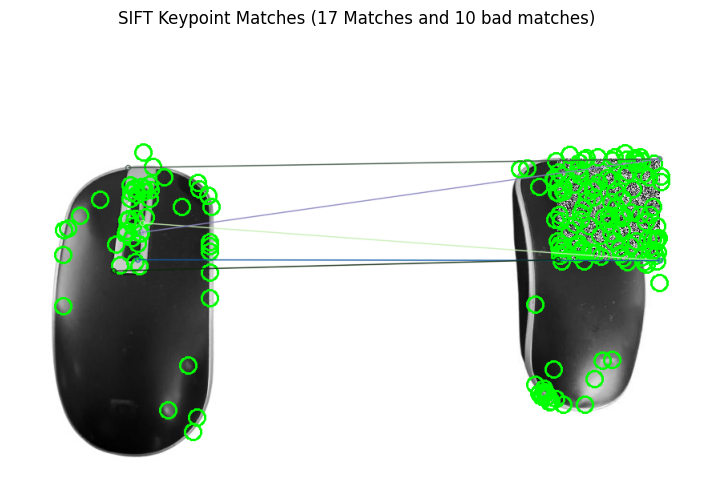

In [41]:
c_image2_tensor =  torch.tensor(compressed_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0
c_image2_tensor=c_image2_tensor.to(device)
_,_,_,_,_=Render_Match_superpoints(image1, image1_tensor,compressed_image, c_image2_tensor)

# **Defense Using GaussianBlur**

In [42]:
def denoise_image(image, strength=10):
    # Apply Gaussian blur to reduce high-frequency noise
    denoised_image = cv2.GaussianBlur(image, (5, 5), strength)
    return denoised_image

denoised_image = denoise_image(patched_image2)

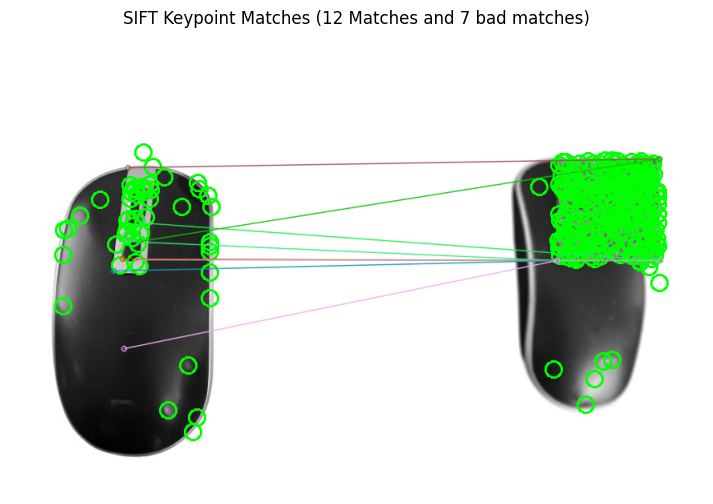

In [43]:
c_image2_tensor =  torch.tensor(denoised_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0
c_image2_tensor=c_image2_tensor.to(device)
_,_,_,_,_=Render_Match_superpoints(image1, image1_tensor,denoised_image, c_image2_tensor)

# **Defense Using Auto Encoder**

In [44]:
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 4, 2, 1), nn.ReLU(),
            nn.Conv2d(16, 32, 4, 2, 1), nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1), nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 4, 2, 1), nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 4, 2, 1), nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 4, 2, 1), nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)


In [45]:
import torch
autoencoder = Autoencoder()  # re-initialize the model class
autoencoder.load_state_dict(torch.load("/content/drive/MyDrive/autoencoder_weights (1).pth",weights_only=False))
autoencoder.to(device)
autoencoder.eval()


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(16, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): Sigmoid()
  )
)

In [46]:
patched_image2.shape

(577, 433)

In [47]:
torch.tensor(patched_image2, dtype=torch.float32).unsqueeze(0).unsqueeze(0).repeat(32, 3, 1, 1).shape

torch.Size([32, 3, 577, 433])

In [48]:
patched_image2_tensor.repeat(32, 3, 1, 1).shape

torch.Size([32, 3, 577, 433])

In [49]:
autoencoded_image = autoencoder(patched_image2_tensor.repeat(32, 3, 1, 1)).to(device) # Reshape and repeat to add channels

In [50]:
"""import matplotlib.pyplot as plt
from torchvision.utils import make_grid

# Function to display a grid of images
def show_images(tensor_images, title="Images"):
    grid = make_grid(tensor_images, nrow=4, normalize=True)
    npimg = grid.cpu().numpy()
    plt.figure(figsize=(8, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()
show_images(autoencoded_image, title="Original Images")"""

'import matplotlib.pyplot as plt\nfrom torchvision.utils import make_grid\n\n# Function to display a grid of images\ndef show_images(tensor_images, title="Images"):\n    grid = make_grid(tensor_images, nrow=4, normalize=True)\n    npimg = grid.cpu().numpy()\n    plt.figure(figsize=(8, 8))\n    plt.imshow(np.transpose(npimg, (1, 2, 0)))\n    plt.title(title)\n    plt.axis(\'off\')\n    plt.show()\nshow_images(autoencoded_image, title="Original Images")'

In [51]:
autoencoded_image.shape

torch.Size([32, 3, 576, 432])

In [52]:
autoencoded_image = autoencoded_image[0:1, 0:1, :, :]
autoencoded_image.shape

torch.Size([1, 1, 576, 432])

In [53]:
autoencoded_patched_image2 = tensor_to_cv2_image(autoencoded_image)
autoencoded_patched_image2.shape

(576, 432)

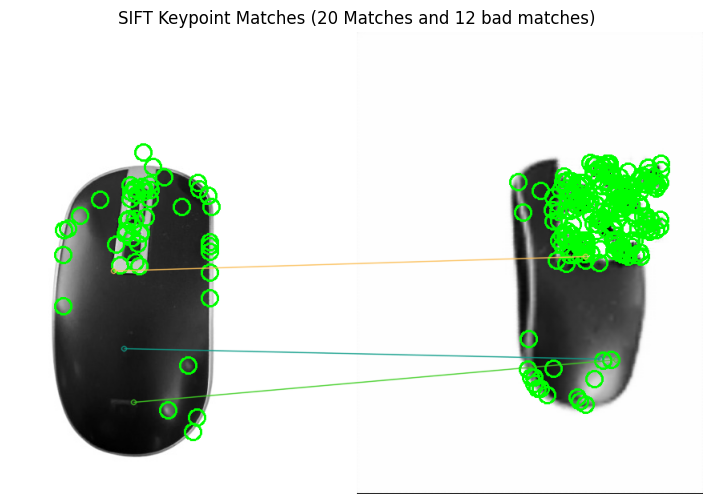

In [55]:
_,_,_,_,_=Render_Match_superpoints(image1, image1_tensor,autoencoded_patched_image2, autoencoded_image)

# **Defence using UNET**

In [56]:
import torch
import torch.nn as nn

class UNetBlock(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1), nn.ReLU(),
            nn.Conv2d(out_ch, out_ch, 3, padding=1), nn.ReLU()
        )

    def forward(self, x):
        return self.block(x)

class UNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Encoder
        self.enc1 = UNetBlock(3, 64)
        self.pool1 = nn.MaxPool2d(2)

        self.enc2 = UNetBlock(64, 128)
        self.pool2 = nn.MaxPool2d(2)

        self.enc3 = UNetBlock(128, 256)
        self.pool3 = nn.MaxPool2d(2)

        # Bottleneck
        self.bottleneck = UNetBlock(256, 512)

        # Decoder
        self.up3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.dec3 = UNetBlock(512, 256)

        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = UNetBlock(256, 128)

        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = UNetBlock(128, 64)

        self.output_layer = nn.Conv2d(64, 3, kernel_size=1)

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool1(e1))
        e3 = self.enc3(self.pool2(e2))

        # Bottleneck
        b = self.bottleneck(self.pool3(e3))

        # Decoder
        d3 = self.up3(b)
        d3 = self.dec3(torch.cat([d3, e3], dim=1))

        d2 = self.up2(d3)
        d2 = self.dec2(torch.cat([d2, e2], dim=1))

        d1 = self.up1(d2)
        d1 = self.dec1(torch.cat([d1, e1], dim=1))

        out = torch.sigmoid(self.output_layer(d1))
        return out


In [57]:
import torch
unet = UNet()  # re-initialize the model class
unet.load_state_dict(torch.load("/content/drive/MyDrive/UNET_weights.pth",weights_only=False))
unet.to(device)
unet.eval()

UNet(
  (enc1): UNetBlock(
    (block): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
    )
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc2): UNetBlock(
    (block): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
    )
  )
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc3): UNetBlock(
    (block): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
    )
  )
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode

In [59]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

In [59]:
torch.cuda.empty_cache()

In [59]:
del model
del sift_model
torch.cuda.empty_cache()

In [59]:
unet_image = unet(patched_image2_tensor.repeat(32, 3, 1, 1)).to(device) # Reshape and repeat to add channels
unet_image = unet_image[0:1, 0:1, :, :]
unet_image_patched_image2 = tensor_to_cv2_image(unet_image)

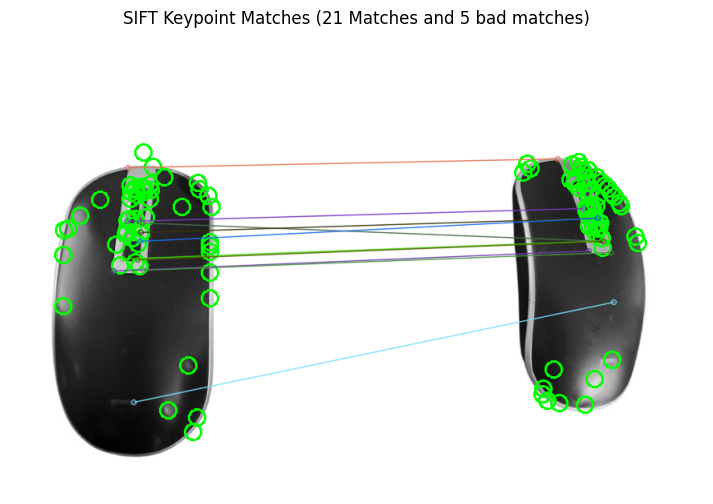

In [59]:
_,_,_,_,_=Render_Match_superpoints(image1, image1_tensor,unet_image_patched_image2, unet_image)